<head>
    <br>
    <h1 style="text-align:center"><Strong>Probability of material failure with distributions</strong></h1>
    <h3 style="text-align:center"> Ing. Alejandro Silva Ramírez</h3>
    <br><br><br>
    <p style="text-align:center;font-size:13px">In this project, data collected from the failure of three different models is analyzed. With all the failure information collected, a distribution function is sought that best fits the actual failure probability of each one, in order to implement safety systems that reduce the probability of these components being damaged. </p>
    <br><br>
</head>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from fitter import Fitter, get_distributions
from fitter.fitter import get_common_distributions

# Extract Data

#### These are the breakage data for the three different cases (only the first 5 data for each are shown for simplification).

In [125]:
# Load data
ruta = "datos_mp2.xlsx"

material = pd.read_excel(ruta, sheet_name="Material")
prensa = pd.read_excel(ruta, sheet_name="Prensa")
reactor = pd.read_excel(ruta, sheet_name="Reactor")

print("Failure Pressure in Material: (MPA)", "\n",  material.head(), "\n")
print("Failure Stress in Press: (kN)", "\n",  prensa.head(), "\n")
print("Failure Temperature in Reactor: (°C)", "\n",  reactor.head(), "\n")

Failure Pressure in Material: (MPA) 
    Esfuerzo de fluencia [MPa
0                 458.426159
1                 637.137563
2                 492.570448
3                 316.604651
4                 415.172424 

Failure Stress in Press: (kN) 
     Fueza [kN]
0  1382.529739
1   513.094619
2   304.269135
3    67.169810
4   863.859526 

Failure Temperature in Reactor: (°C) 
    Temperatura [°C]
0        724.194656
1        689.793251
2        697.876826
3        562.836905
4        625.758371 



# Visualize Data



#### All values in which failures have occurred are graphed.

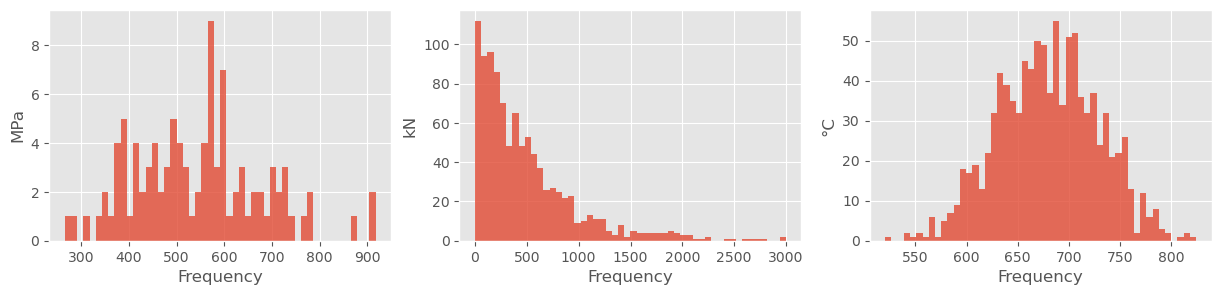

In [66]:
# Style
plt.style.use('ggplot')

# Plot Data:
plt.figure(figsize = (15, 3), dpi = 100)

plt.subplot(131)
plt.hist(material, bins=50, alpha=0.8)
plt.xlabel("Frequency")
plt.ylabel("MPa")

plt.subplot(132)
plt.hist(prensa, bins=50, alpha=0.8)
plt.xlabel("Frequency")
plt.ylabel("kN")

plt.subplot(133)
plt.hist(reactor, bins=50, alpha=0.8)
plt.xlabel("Frequency")
plt.ylabel("°C")

plt.show()

# Find Better Distribution

## 1. Distributions for Material:

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000251  1371.396014  1379.211525     inf      0.069044   
chi2             0.000251  1371.396020  1379.211531     inf      0.069044   
lognorm          0.000251  1372.399760  1380.215270     inf      0.068565   
norm             0.000251  1376.407981  1381.618322     inf      0.069809   
rayleigh         0.000257  1351.242678  1356.453019     inf      0.088030   

          ks_pvalue  
gamma      0.700733  
chi2       0.700733  
lognorm    0.708739  
norm       0.687880  
rayleigh   0.397510  


{'gamma': {'a': 16.07933222773658,
  'loc': 3.6299557966102074,
  'scale': 33.646449152917555}}

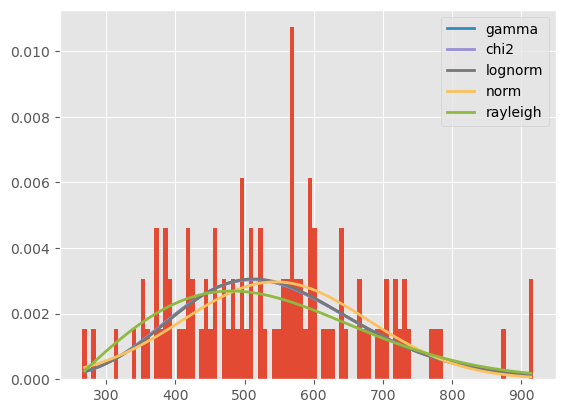

In [91]:
# PDF Material
f_material = Fitter(material, distributions = get_common_distributions())
f_material.fit()

print(f_material.summary())
f_material.get_best(method = 'sumsquare_error')

#### The best distribution is "gamma", and these are the params of the distribution:

In [143]:
params_material = f_material.fitted_param["gamma"]
params_material

(16.07933222773658, 3.6299557966102074, 33.646449152917555)

## 2. Distribution for Prensa:

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon        9.297130e-07  1858.333291  1868.148802     inf      0.018152   
gamma        1.015085e-06  1852.661219  1867.384485     inf      0.026271   
exponpow     1.853809e-06  1887.954798  1902.678064     inf      0.063062   
lognorm      2.216373e-06  1844.060703  1858.783969     inf      0.046426   
cauchy       7.870702e-06  1917.604823  1927.420333     inf      0.193037   

             ks_pvalue  
expon     8.905777e-01  
gamma     4.868552e-01  
exponpow  6.702609e-04  
lognorm   2.599996e-02  
cauchy    4.090029e-33  


{'expon': {'loc': 0.4903556588589409, 'scale': 485.43840138541145}}

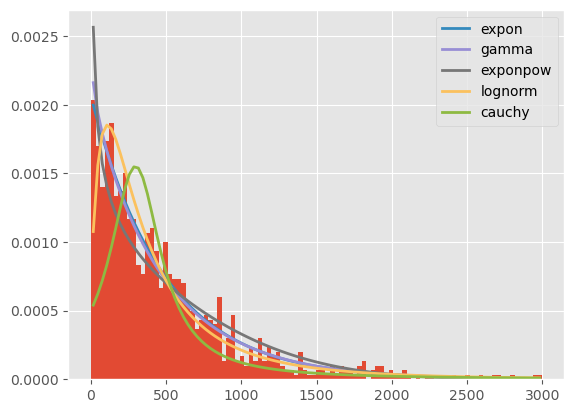

In [171]:
# PDF Prensa
f_prensa = Fitter(prensa, distributions = get_common_distributions())
f_prensa.fit()

# Prensa:
print(f_prensa.summary())
f_prensa.get_best(method = 'sumsquare_error')

#### The best distribution is "expon", and these are the params of the distribution:

In [173]:
params_prensa = f_prensa.fitted_param["expon"]
params_prensa

(0.4903556588589409, 485.43840138541145)

## 3. Distribution for Reactor:

         sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm         0.000127  1289.716959  1304.440224     inf      0.021020   
norm            0.000127  1287.716852  1297.532363     inf      0.021020   
gamma           0.000127  1290.649337  1305.372603     inf      0.020553   
chi2            0.000130  1294.345087  1309.068353     inf      0.026972   
cauchy          0.000292  1275.365533  1285.181044     inf      0.081612   

         ks_pvalue  
lognorm   0.760616  
norm      0.760614  
gamma     0.784023  
chi2      0.453014  
cauchy    0.000003  


{'lognorm': {'s': 1.1342778502165446e-06,
  'loc': -43320175.673311874,
  'scale': 43320855.63835826}}

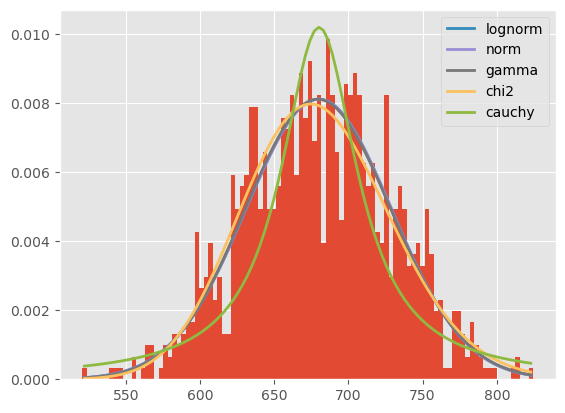

In [177]:
# PDF Reactor
f_reactor = Fitter(reactor, distributions = get_common_distributions())
f_reactor.fit()

# Reactor:
print(f_reactor.summary())
f_reactor.get_best(method = 'sumsquare_error')

#### The best distribution is "lognorm", and these are the params of the distribution:

In [180]:
params_reactor = f_reactor.fitted_param["lognorm"]
params_reactor

(1.1342778502165446e-06, -43320175.673311874, 43320855.63835826)

# Final Probability Distribution Function (PDF)

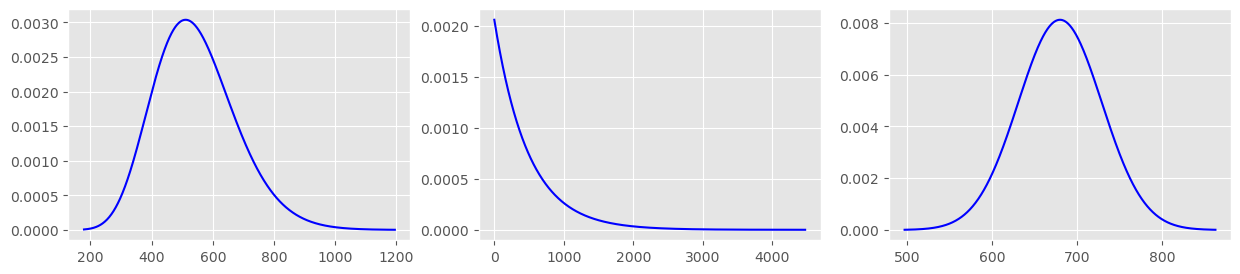

In [187]:
# Material:
dist_material = stats.gamma(params_material[0], params_material[1], params_material[2])
x_material = np.linspace(dist_material.ppf(0.0001), dist_material.ppf(0.9999), 1000)

# Prensa:
dist_prensa = stats.expon(params_prensa[0], params_prensa[1])
x_prensa = np.linspace(dist_prensa.ppf(0.0001), dist_prensa.ppf(0.9999), 1000)

# Reactor:
dist_reactor = stats.lognorm(params_reactor[0], params_reactor[1], params_reactor[2])
x_reactor = np.linspace(dist_reactor.ppf(0.0001), dist_reactor.ppf(0.9999), 1000)

# Plots:
plt.figure(figsize = (15, 3), dpi = 100)

plt.subplot(131)
plt.plot(x_material, dist_material.pdf(x_material), color='b')

plt.subplot(132)
plt.plot(x_prensa, dist_prensa.pdf(x_prensa), color='b')

plt.subplot(133)
plt.plot(x_reactor, dist_reactor.pdf(x_reactor), color='b')

plt.show()

# PDF Graphs

#### PDF Graphs with Safe and Dangerous Zone for each case.

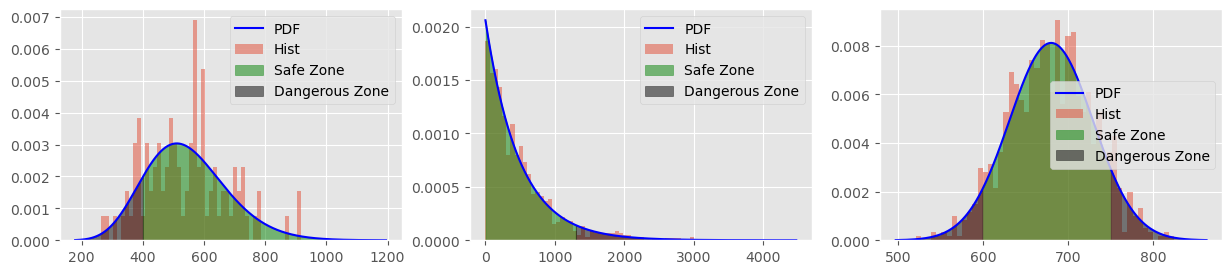

In [192]:
# Plot:
plt.figure(figsize = (15, 3), dpi = 100)

valor_material = 400 # Mayor a 400 Pa
rango_material_g = np.arange(valor_material, x_material[-1])
rango_material_r = np.arange(x_material[0], valor_material)
plt.subplot(131)
plt.plot(x_material, dist_material.pdf(x_material), color='b', label="PDF")
plt.hist(material, bins=50, alpha=0.5, density=True, label="Hist")
plt.fill_between(rango_material_g, dist_material.pdf(rango_material_g), color='g', alpha=0.5, label="Safe Zone")
plt.fill_between(rango_material_r, dist_material.pdf(rango_material_r), color='k', alpha=0.5, label="Dangerous Zone")
plt.legend(loc = 0)

valor_prensa = 1300 # Menor a 1300 kN
rango_prensa_g = np.arange(x_prensa[0], valor_prensa)
rango_prensa_r = np.arange(valor_prensa, x_prensa[-1])
plt.subplot(132)
plt.plot(x_prensa, dist_prensa.pdf(x_prensa), color='b', label="PDF")
plt.hist(prensa, bins=50, alpha=0.5, density=True, label="Hist")
plt.fill_between(rango_prensa_g, dist_prensa.pdf(rango_prensa_g), color='g', alpha=0.5, label="Safe Zone")
plt.fill_between(rango_prensa_r, dist_prensa.pdf(rango_prensa_r), color='k', alpha=0.5, label="Dangerous Zone")
plt.legend(loc = 0)

valor_reactor_1 = 600 # Mayor a 600 °C
valor_reactor_2 = 750 # Menor a 750 °C
rango_reactor_g = np.arange(valor_reactor_1, valor_reactor_2)
rango_reactor_r_1 = np.arange(x_reactor[0], valor_reactor_1)
rango_reactor_r_2 = np.arange(valor_reactor_2, x_reactor[-1])
plt.subplot(133)
plt.plot(x_reactor, dist_reactor.pdf(x_reactor), color='b', label="PDF")
plt.hist(reactor, bins=50, alpha=0.5, density=True, label="Hist")
plt.fill_between(rango_reactor_g, dist_reactor.pdf(rango_reactor_g), color='g', alpha=0.5, label="Safe Zone")
plt.fill_between(rango_reactor_r_1, dist_reactor.pdf(rango_reactor_r_1), color='k', alpha=0.5, label="Dangerous Zone")
plt.fill_between(rango_reactor_r_2, dist_reactor.pdf(rango_reactor_r_2), color='k', alpha=0.5)
plt.legend(loc = 0)

plt.show()

# Cumulated Distribution Function (CDF)

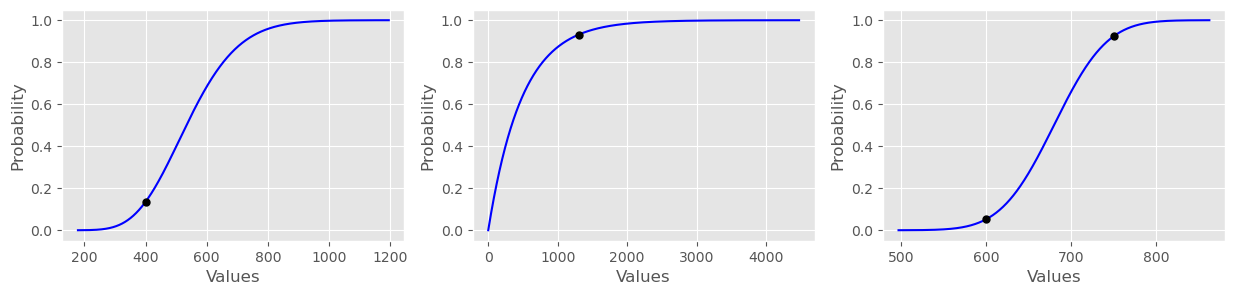

In [198]:
# Plot:
plt.figure(figsize = (15, 3), dpi = 100)

plt.subplot(131)
plt.plot(x_material, dist_material.cdf(x_material), color='b')
plt.ylabel('Probability')
plt.xlabel('Values')
plt.plot(valor_material, dist_material.cdf(valor_material), "ko", markersize=5)

plt.subplot(132)
plt.plot(x_prensa, dist_prensa.cdf(x_prensa), color='b')
plt.ylabel('Probability')
plt.xlabel('Values')
plt.plot(valor_prensa, dist_prensa.cdf(valor_prensa), "ko", markersize=5)

plt.subplot(133)
plt.plot(x_reactor, dist_reactor.cdf(x_reactor), color='b')
plt.ylabel('Probability')
plt.xlabel('Values')
plt.plot(valor_reactor_1, dist_reactor.cdf(valor_reactor_1), "ko", markersize=5)
plt.plot(valor_reactor_2, dist_reactor.cdf(valor_reactor_2), "ko", markersize=5)

plt.show()

# Probabilities

#### What is the probability that a material, based on normal operating data, will be damaged?

In [201]:
prob_material = dist_material.cdf(valor_material)
prob_prensa = 1 - dist_prensa.cdf(valor_prensa)
prob_reactor = (1-dist_reactor.cdf(valor_reactor_2)) + dist_reactor.cdf(valor_reactor_1)

print(f"The probability of material failure is: {prob_material:.2f} or {prob_material*100:.2f} %")
print(f"The probability of press failure is: {prob_prensa:.2f} or {prob_prensa*100:.2f} %")
print(f"The probability of reactor failure is: {prob_reactor:.2f} or {prob_reactor*100:.2f} %")

The probability of material failure is: 0.14 or 13.55 %
The probability of press failure is: 0.07 or 6.88 %
The probability of reactor failure is: 0.13 or 12.89 %
